# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

--> 
Tujuan proyek <--

adalah untuk mengetahui faktor apa saja yang mempengaruhi harga sebuah kendaraan yang diiklankan dalam situs web setiap harinya.

langkah yang akan dilakukan :
- menyiapkan data supaya bisa di proses lebih lanjut
- menangani nilai yang hilang, duplicate (jika ada )
- merubah tipe data apabila diperlukan
- membuat beberapa perhitungan tambahan atau data tambahan dan menyimpan dalam kolom tambahan untuk mempermudah analisa
- melakukan analisa eksplorasi data baik dengan angka ataupun dalam bentuk chart/grafik
- membuat kesimpulan

## Pra-pemrosesan

--> import library <--

sebelum melakukan pra-pemrosesan data, perlu import beberapa library yang kiranya diperlukan

In [1]:
# Muat semua library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')



### Memuat Data

--> membaca data <--

In [2]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')


### Mengeksplorasi Data Awal

*Dataset* info and glossary


- `price`  - harga kendaraan
- `model_year` - tahun keluaran model kendaran
- `model` - model kendaraaan
- `condition` - kondisi kendaraan
- `cylinders` - jumlah silinder mesin
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission` - jenis transmisi mesin
- `paint_color` - warna cat
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 


In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# tampilkan sampel data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
#mencari apakah ada duplicate
df.duplicated().sum()

0

--> potensi masalah pada data <--

dari contoh data diatas, terlihat beberapa masalah dari sumber data ini, diantaranya :
- ada nilai yang hilang ( contoh di kolom model_year, odometer, paint_color dan is_4wd)
- tipe data ada yang tidak sesuai ( contoh model_year menggunakan pecahan, seharusnya tahun itu integer)

hal ini memerlukan penyelidikan dan perubahan untuk memperbaikinya

In [6]:
#melihat deskripsi data
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
#melihat tipe data
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

-->tipe data yang tidak sesuai<--

contoh :
- pada kolom model_year menggunakan tipe float, seharusnya integer 
- pada kolom cylinders  menggunakan tipe float, seharusnya integer
- pada kolom is_4wd     menggunakan tipe float, seharusnya integer

-> nilai yang hilang <--

selanjutnya menyelidiki nilai yang hilang, dengan menggunakan metode isnull pada dataframe

In [8]:
df.isnull().sum().sort_values(ascending = False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

==> nilai yang hilang :

- ada nilai yang hilang dalam beberapa kolom / tidak semua kolom.
- dari 5 kolom yang terdapat nilai hilang, kolom is_4wd adalah yang paling banyak kehilangan data yaitu sebesar 25953


-->
Kesimpulan terkait data awal :
- ada 5 kolom yang memiliki nilai yang hilang 
- beberapa kolom memiliki tipe data yang tidak sesuai
- ada bebera nilai yang aneh/tidak normal
- tidak ada nilai data yang duplicate

Langkah Selanjutnya :
- mengatasi nilai yang hilang pada kolom :
    - is_4wd          
    - paint_color      
    - odometer         
    - cylinders        
    - model_year       
- memperbaiki tipe data yang tidak sesuai
    - model_year
    - cylinders
    - is_4wd
    - date_posted
- menyelidi nilai2 yang aneh/tidak normal
    - age_car


## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

--> mengecek nilai yang hilang di setiap kolom lebih detail sebelum melakukan langkah perbaikan data

In [9]:
#cek deskripsi dataframe
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [10]:
#cek nilai hilang dataframe
df.isnull().sum().sort_values(ascending = False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

In [11]:
#munculkan dataframe
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


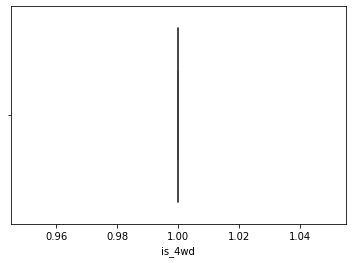

In [12]:
#cek boxplot pada kolom yang nilainya hilang
sns.boxplot(df['is_4wd']);

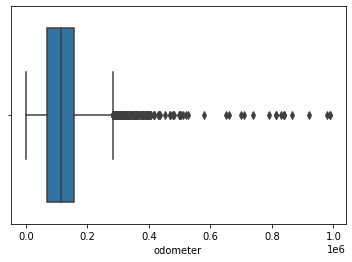

In [13]:
sns.boxplot(df['odometer']);

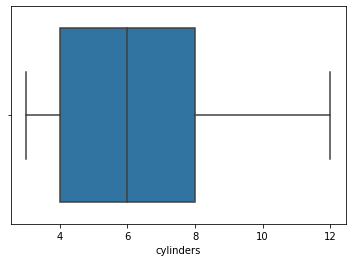

In [14]:
sns.boxplot(df['cylinders']);

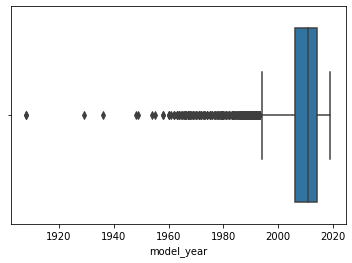

In [15]:
sns.boxplot(df['model_year']);

--> membuat fungsi untuk mengisi nilai yang hilang

In [16]:
def fill_missing_value (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [17]:
#mengisi nilai yang hilang dengan median pada kolom (odometer, cylinders, dan model_year )
df= fill_missing_value(df,'condition','odometer')
df= fill_missing_value(df,'condition','cylinders')
df= fill_missing_value(df,'condition','model_year')

#mengisi nilai yang hilang dengan '0' pada kolom is_4wd
df['is_4wd']= df['is_4wd'].fillna(0).astype('int')

#mengisi nilai yang hilang kolom paint_color dengan 'unknown'
df['paint_color'] = df['paint_color'].fillna('unknown')

In [18]:
#mengecek ulang apakah masih ada variable yang hilang pada dataframe
df.isnull().sum().sort_values(ascending = False)

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [19]:
#memuat ulang dataframe (setelah diisi nilai2 yang hilang)
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0,2018-07-02,71


==>
Catatan :
- data hilang di kolom is_4wd diisi dengan '0' --> asumsi kalau tidak 4wd maka model biasa/non 4wd
- data hilang di kolom paint_color diisi dengan 'unknown' --> karena kita tidak tahu cat nya sperti apa
- data hilang di kolom odometer diisi dengan median  --> karena dari boxplot terlihat banyak outlier, maka dipilih median biar aman
- data hilang di kolom cylinders diisi dengan median --> data nya aman, jadi bisa menggunakan median ataupun mean, kita pilih median saja
- data hilang di kolom model_year diisi dengan median  --> karena dari boxplot terlihat banyak outlier, maka dipilih median biar aman


## Memperbaiki Tipe Data

--> selanjutnya memperbaiki tipe data

In [20]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd            int64
date_posted      object
days_listed       int64
dtype: object

==>
dari type data diatas yang perlu diperbaiki :
- model_year dari float ke integer --> karena tahun tidak ada yang pecahan
- cylinders dari float ke integer  --> karena jumlah silinder tidak ada yang pecahan
- is_4wd dari int ke boolean     --> karena lebih mudah difahami dengan logika 'true' or 'False'
- date_posted dari object ke format date time --> supaya lebih mudah di fahami


In [21]:
#merubah tipe data
#df['model_year'] = df['model_year'].fillna(0).astype('int')
#df['cylinders'] = df['cylinders'].fillna(0).astype('int')
#df['is_4wd'] = df['is_4wd'].fillna(0).astype('bool')
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [22]:
#revisi 1 --> merubah tipe data is_4wd ke boolean
df['is_4wd'] = df['is_4wd'].astype('bool')

#revisi 2 --> merubah tipe data model_year ke integer
df['model_year'] = df['model_year'].astype('int')

#revisi 2 --> merubah tipe data cylinders ke integer
df['cylinders'] = df['cylinders'].astype('int')



In [23]:
#menampilkan tipe data setelah di perbaiki
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [24]:
#memuat dataframe setelah tipe data diperbaiki
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71


## Memperbaiki Kualitas Data

======= beberapa informasi yang ditambahkan untuk mempermudah analisa========

- Hari dalam minggu, bulan, dan tahun iklan ditayangkan
- Usia kendaraan (dalam tahun) ketika iklan ditayangkan
- Jarak tempuh rata-rata kendaraan per tahun
- Pada kolom condition, ganti nilai string dengan skala numerik:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [25]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['year_posted'] = df['date_posted'].dt.year

In [26]:
#revisi ==> tambahkan kolom month and date
df['month_posted'] = df['date_posted'].dt.month
df['day_posted'] = df['date_posted'].dt.day

In [27]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['age_car'] = df['year_posted'] - df['model_year']
df['age_car'] = df['age_car'].replace([0],1)

==> keterangan <==

pada saat usia kendaraan didapatkan 0 (dimana penjualan dilakukan pada tahun yang sama dengan pembelian ), maka dianggap termasuk barang bekas dengan pembulatan angka 1 (tahun)

In [28]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['avg_odo'] = df['odometer']/df['age_car']

In [29]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
def get_condition (value):
    if value == 'new':
        return 5
    elif value == 'like new':
        return 4
    elif value == 'excellent':
        return 3
    elif value == 'good':
        return 2
    elif value == 'fair':
        return 1
    else:
        return 0

In [30]:
df['condition_value'] = df['condition'].apply(get_condition) 


In [31]:
#memuat dataframe setelah diperbaiki kualitas data nya
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age_car,avg_odo,condition_value
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,6,23,7,20714.285714,2
1,25500,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,19,9,9856.111111,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,7,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,2019,3,22,16,11350.812500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,2,2,40451.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2018,10,3,5,17627.200000,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2018,11,14,16,11343.750000,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,2018,11,15,9,14222.222222,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2018,7,2,5,27914.600000,2


## Memeriksa Data yang Sudah Bersih

--> sebelum melakukan analisa lebih lanjut, cek ricek lagi dataframe

In [32]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  year_posted      51525 non-null  int64         
 14  month_posted     51525 non-null  int64

In [33]:
# tampilkan sampel data 
df.sample (6)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,age_car,avg_odo,condition_value
28672,3995,2006,nissan sentra,excellent,4,gas,99862.0,automatic,sedan,blue,False,2018-05-29,66,2018,5,29,12,8321.833333,3
5507,42995,2012,chevrolet suburban,excellent,8,gas,40800.0,automatic,SUV,black,True,2018-11-19,103,2018,11,19,6,6800.000000,3
47517,8500,2008,toyota highlander,like new,6,gas,121000.0,automatic,SUV,grey,True,2019-02-26,6,2019,2,26,11,11000.000000,4
44386,8950,2009,toyota 4runner,good,6,gas,190.0,automatic,SUV,unknown,True,2018-11-29,29,2018,11,29,9,21.111111,2
1793,2300,2005,volkswagen jetta,good,4,gas,129000.0,automatic,sedan,black,False,2018-11-08,144,2018,11,8,13,9923.076923,2
35370,15588,2013,honda cr-v,good,4,gas,70004.0,automatic,SUV,blue,True,2018-08-11,48,2018,8,11,5,14000.800000,2


## Mempelajari Parameter Inti 
--> perlu di pelajari lebih lanjut beberapa parameter berikut sebelum analisa lebih lanjut:

- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

--> kita gunakan boxplot untuk melihat komposisi data nya

<AxesSubplot:xlabel='price'>

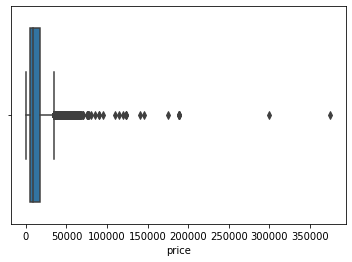

In [34]:
#cek boxplot harga
sns.boxplot(df['price'])

<AxesSubplot:xlabel='age_car'>

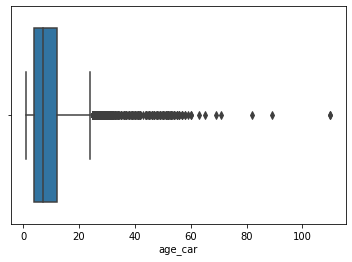

In [35]:
#cek boxplot umur kendaraan
sns.boxplot(df['age_car'])


<AxesSubplot:xlabel='odometer'>

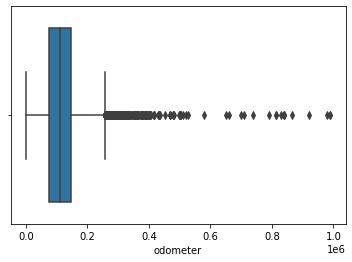

In [36]:
##cek boxplot odometer
sns.boxplot(df['odometer'])


<AxesSubplot:xlabel='cylinders'>

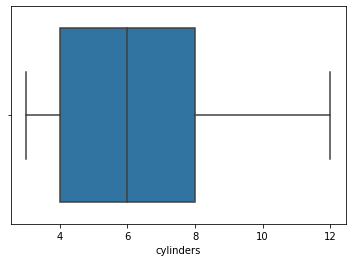

In [37]:
#cek boxplot umur silinder

sns.boxplot(df['cylinders'])


<AxesSubplot:xlabel='cylinders', ylabel='count'>

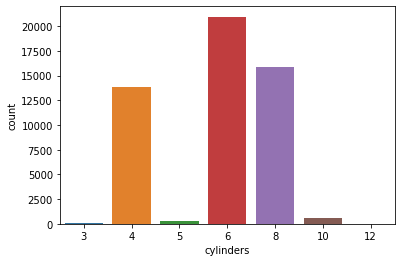

In [38]:
#munculkan countplort untuk silinder
sns.countplot(df['cylinders'])

In [39]:
df['cylinders'].value_counts()

6     20960
8     15844
4     13864
10      549
5       272
3        34
12        2
Name: cylinders, dtype: int64

==> note:

pada parameter 'cylinder' tidak ditemukan adanya outlier

<AxesSubplot:xlabel='condition_value'>

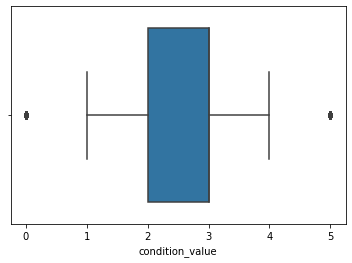

In [40]:
#cek boxplot umur condition_value

sns.boxplot(df['condition_value'])

<AxesSubplot:xlabel='condition_value', ylabel='count'>

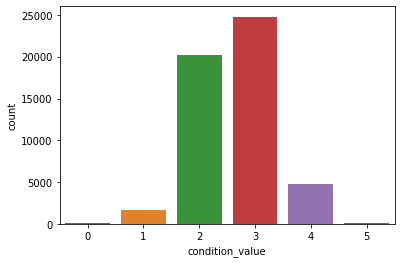

In [41]:
sns.countplot(df['condition_value'])

In [42]:
df['condition_value'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition_value, dtype: int64

== note ==

nilai '0' dan '5' disini nilainya cukup kecil/sedikit, kalo di cek di boxplot dianggap sebagai outlier, namun data ini tidak mengganggu dari visualisasi data



## Mempelajari dan Menangani Outlier



== note ==

dari analisa dan mempelajari parameter inti, kolom yang mungkin ada outlier nya adalah:
- 'price'
- 'age_car'
- 'odometer'

selanjutnya akan kita hilangkan nilai nilai outlier dari masing-masing kolom tersebut dan menyimpan kedalam dataframe baru

--> menangani outlier pada kolo 'price'

In [43]:
# Tentukan batas bawah outlier untuk kolom 'price'
Q1_price = df['price'].quantile (0.25)
Q3_price = df['price'].quantile (0.75)
IQR_price = Q3_price - Q1_price

lower_whisker_price = Q1_price - (1.5*IQR_price)
print ("Lower whisker Price :",lower_whisker_price )


Lower whisker Price : -12758.5


In [44]:
# Tentukan batas atas outlier untuk kolom 'price'
upper_whisker_price = Q3_price + (1.5*IQR_price)
print ("Upper whisker Price :",upper_whisker_price )

Upper whisker Price : 34597.5


In [45]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df1 = df[(df['price']>lower_whisker_price)&(df['price']<upper_whisker_price)].reset_index(drop=True)


In [46]:
df1.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,avg_odo,condition_value
count,49879.000000,49879.000000,49879.000000,49879.000000,49879.000000,49879.000000,49879.000000,49879.000000,49879.000000,49879.000000,49879.000000
mean,11095.558472,2009.637824,6.076345,117202.472173,39.549871,2018.307404,6.628080,15.453317,8.700956,18621.148278,2.620622
std,7806.520888,5.970281,1.575170,59692.195503,28.206393,0.461423,3.474422,8.737043,5.941580,15669.814508,0.705816
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4995.000000,2006.000000,4.000000,79549.000000,19.000000,2018.000000,3.000000,8.000000,4.000000,10433.416667,2.000000
50%,8990.000000,2011.000000,6.000000,113393.000000,33.000000,2018.000000,7.000000,15.000000,8.000000,14890.000000,3.000000
75%,15900.000000,2014.000000,8.000000,149371.000000,53.000000,2019.000000,10.000000,23.000000,12.000000,21500.000000,3.000000
max,34595.000000,2019.000000,12.000000,990000.000000,271.000000,2019.000000,12.000000,31.000000,110.000000,373200.000000,5.000000


In [47]:
# Tentukan batas bawah dan batas atas outlier yang baru untuk kolom 'price'
Q1_price = df1['price'].quantile (0.25)
Q3_price = df1['price'].quantile (0.75)
IQR_price = Q3_price - Q1_price

lower_whisker_price = Q1_price - (1.5*IQR_price)
upper_whisker_price = Q3_price + (1.5*IQR_price)
print ("New Lower whisker Price :",lower_whisker_price )
print ("New Upper whisker Price :",upper_whisker_price )

New Lower whisker Price : -11362.5
New Upper whisker Price : 32257.5


In [48]:
# Simpan data tanpa outlier kolom'price' terbaru dalam DataFrame yang terpisah
df2 = df1[(df1['price']>lower_whisker_price)&(df1['price']<upper_whisker_price)].reset_index(drop=True)

In [49]:
df2.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,avg_odo,condition_value
count,49437.000000,49437.000000,49437.000000,49437.000000,49437.000000,49437.000000,49437.000000,49437.000000,49437.000000,49437.000000,49437.000000
mean,10895.623804,2009.589316,6.066833,117748.492495,39.545887,2018.307219,6.629164,15.455812,8.747618,18562.357715,2.618120
std,7547.991771,5.950957,1.575571,59540.832448,28.189917,0.461346,3.473451,8.737254,5.924458,15548.543492,0.705238
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4995.000000,2006.000000,4.000000,80279.000000,19.000000,2018.000000,3.000000,8.000000,5.000000,10434.200000,2.000000
50%,8900.000000,2011.000000,6.000000,114000.000000,33.000000,2018.000000,7.000000,15.000000,8.000000,14890.000000,3.000000
75%,15500.000000,2014.000000,8.000000,150000.000000,53.000000,2019.000000,10.000000,23.000000,12.000000,21500.000000,3.000000
max,32250.000000,2019.000000,12.000000,990000.000000,271.000000,2019.000000,12.000000,31.000000,110.000000,373200.000000,5.000000


==> cek outlier dengan boxplot <==

<AxesSubplot:xlabel='price'>

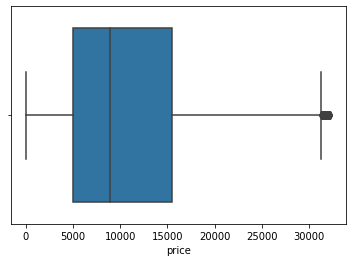

In [50]:
sns.boxplot(df2['price'])

== selanjutnya untuk kolom 'age_car' ==

kita gunakan dataframe df2, dimana dataframe pada kolom 'price' sudah bersih dari outlier, sekarang dilanjutkan membersihkan outlier di kolom 'age_car'

In [51]:
# Tentukan batas bawah outlier untuk kolom 'age_car'
Q1_age_car = df2['age_car'].quantile (0.25)
Q3_age_car = df2['age_car'].quantile (0.75)
IQR_age_car = Q3_age_car - Q1_age_car

lower_whisker_age_car = Q1_age_car - (1.5*IQR_age_car)
print ("Lower whisker Age_Car :",lower_whisker_age_car )

Lower whisker Age_Car : -5.5


In [52]:
# Tentukan batas atas outlier untuk kolom 'age_car'
upper_whisker_age_car = Q3_age_car + (1.5*IQR_age_car)
print ("Upper whisker age_car :",upper_whisker_age_car )

Upper whisker age_car : 22.5


In [53]:
# Simpan data tanpa outlier di kolom 'age_car' dalam DataFrame yang terpisah
df3 = df2[(df2['age_car']>lower_whisker_age_car)&(df2['age_car']<upper_whisker_age_car)].reset_index(drop=True)

In [54]:
# Tentukan batas bawah dan batas atas outlier yang baru untuk kolom 'age_car'
Q1_age_car = df3['age_car'].quantile (0.25)
Q3_age_car = df3['age_car'].quantile (0.75)
IQR_age_car = Q3_age_car - Q1_age_car


lower_whisker_age_car = Q1_age_car - (1.5*IQR_age_car)
upper_whisker_age_car = Q3_age_car + (1.5*IQR_age_car)
print ("New Lower whisker Age Car :",lower_whisker_age_car )
print ("New Upper whisker Age Car :",upper_whisker_age_car )

New Lower whisker Age Car : -8.0
New Upper whisker Age Car : 24.0


In [55]:
# Simpan data tanpa outlier kolom'age_car' terbaru dalam DataFrame yang terpisah
df4 = df3[(df3['age_car']>lower_whisker_age_car)&(df3['age_car']<upper_whisker_age_car)].reset_index(drop=True)


In [56]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,avg_odo,condition_value
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.816419,6.112450,115199.014508,39.55476,2018.307462,6.628491,15.449491,8.532479,18931.848574,2.637535
std,10040.803015,6.091605,1.573784,60484.863376,28.20427,0.461447,3.474134,8.736521,6.051000,16241.726320,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,2018.000000,3.000000,8.000000,4.000000,10440.500000,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,2018.000000,7.000000,15.000000,7.000000,15000.000000,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,2019.000000,10.000000,23.000000,12.000000,21772.333333,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,2019.000000,12.000000,31.000000,110.000000,373200.000000,5.000000


In [57]:
df4.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,avg_odo,condition_value
count,48414.000000,48414.00000,48414.000000,48414.000000,48414.000000,48414.00000,48414.000000,48414.000000,48414.000000,48414.000000,48414.000000
mean,10988.763106,2010.04224,6.047713,117433.893843,39.539699,2018.30644,6.635374,15.461395,8.294543,18850.511830,2.627153
std,7555.533672,4.93738,1.574405,59020.519808,28.187600,0.46102,3.472589,8.737774,4.904019,15576.096952,0.699947
min,1.000000,1996.00000,3.000000,0.000000,0.000000,2018.00000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4995.000000,2007.00000,4.000000,80250.500000,19.000000,2018.00000,3.000000,8.000000,4.000000,10727.272727,2.000000
50%,8995.000000,2011.00000,6.000000,113648.000000,33.000000,2018.00000,7.000000,15.000000,8.000000,15066.285714,3.000000
75%,15694.000000,2014.00000,8.000000,149245.000000,53.000000,2019.00000,10.000000,23.000000,12.000000,21648.187500,3.000000
max,32250.000000,2019.00000,12.000000,990000.000000,271.000000,2019.00000,12.000000,31.000000,22.000000,373200.000000,5.000000


==> cek outlier dengan boxplot <==

<AxesSubplot:xlabel='age_car'>

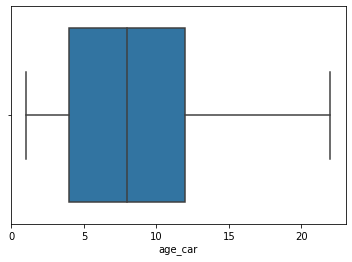

In [58]:
sns.boxplot(df4['age_car'])

== selanjutnya untuk kolom 'odometer' ==

- kita gunakan dataframe df4, dimana dataframe pada kolom 'price' dan 'age_car' sudah bersih dari outlier, sekarang dilanjutkan membersihkan outlier di kolom 'odometer'

In [59]:
# Tentukan batas bawah outlier untuk kolom 'odometer'
Q1_odometer = df4['odometer'].quantile (0.25)
Q3_odometer = df4['odometer'].quantile (0.75)
IQR_odometer = Q3_odometer - Q1_odometer

lower_whisker_odometer = Q1_odometer - (1.5*IQR_odometer)
print ("Lower whisker Odometer :",lower_whisker_odometer )

Lower whisker Odometer : -23241.25


In [60]:
# Tentukan batas atas outlier untuk kolom 'odometer'
upper_whisker_odometer = Q3_odometer + (1.5*IQR_odometer)
print ("Upper whisker odometer :",upper_whisker_odometer )

Upper whisker odometer : 252736.75


In [61]:
# Simpan data tanpa outlier di kolom 'odometer' dalam DataFrame yang terpisah
df5 = df4[(df4['odometer']>lower_whisker_odometer)&(df4['odometer']<upper_whisker_odometer)].reset_index(drop=True)

In [62]:
# Tentukan batas bawah dan batas atas outlier yang baru untuk kolom 'odometer'
Q1_odometer = df5['odometer'].quantile (0.25)
Q3_odometer = df5['odometer'].quantile (0.75)
IQR_odometer = Q3_odometer - Q1_odometer


lower_whisker_odometer = Q1_odometer - (1.5*IQR_odometer)
upper_whisker_odometer = Q3_odometer + (1.5*IQR_odometer)
print ("New Lower whisker odometer :",lower_whisker_odometer )
print ("New Upper whisker odometer :",upper_whisker_odometer )

New Lower whisker odometer : -20968.75
New Upper whisker odometer : 246181.25


In [63]:
# Simpan data tanpa outlier kolom'odometer' terbaru dalam DataFrame yang terpisah
df6 = df5[(df5['odometer']>lower_whisker_odometer)&(df5['odometer']<upper_whisker_odometer)].reset_index(drop=True)


In [64]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,avg_odo,condition_value
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.816419,6.112450,115199.014508,39.55476,2018.307462,6.628491,15.449491,8.532479,18931.848574,2.637535
std,10040.803015,6.091605,1.573784,60484.863376,28.20427,0.461447,3.474134,8.736521,6.051000,16241.726320,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,2018.000000,3.000000,8.000000,4.000000,10440.500000,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,2018.000000,7.000000,15.000000,7.000000,15000.000000,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,2019.000000,10.000000,23.000000,12.000000,21772.333333,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,2019.000000,12.000000,31.000000,110.000000,373200.000000,5.000000


In [65]:
df6.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,age_car,avg_odo,condition_value
count,47281.000000,47281.000000,47281.000000,47281.000000,47281.000000,47281.000000,47281.000000,47281.000000,47281.000000,47281.000000,47281.000000
mean,11107.311986,2010.183668,6.033333,113256.107051,39.543368,2018.306508,6.634441,15.460206,8.153867,18708.244791,2.639961
std,7574.557260,4.864733,1.573358,51987.690678,28.201952,0.461048,3.472528,8.737625,4.830629,15283.855421,0.694827
min,1.000000,1996.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,79000.000000,19.000000,2018.000000,3.000000,8.000000,4.000000,10625.000000,2.000000
50%,8995.000000,2011.000000,6.000000,111777.000000,33.000000,2018.000000,7.000000,15.000000,7.000000,14901.428571,3.000000
75%,15900.000000,2014.000000,8.000000,145179.000000,53.000000,2019.000000,10.000000,23.000000,11.000000,21500.000000,3.000000
max,32250.000000,2019.000000,12.000000,246100.000000,271.000000,2019.000000,12.000000,31.000000,22.000000,195700.000000,5.000000


==> cek outlier dengan boxplot pada odometer <==

<AxesSubplot:xlabel='odometer'>

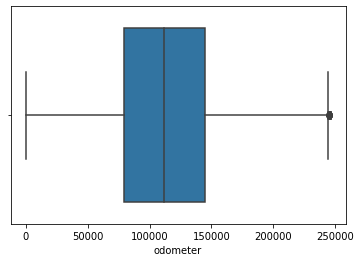

In [66]:
sns.boxplot(df6['odometer'])

== catatan ==

- dataframe yang dihasilkan setelah kolom 'price' bersih dari outlier adalah --> df2
- dataframe yang dihasilkan setelah kolom 'age_car' bersih dari outlier adalah --> df4
- dataframe yang dihasilkan setelah kolom 'odometer' bersih dari outlier adalah --> df6

## Mempelajari Parameter Inti Tanpa Outlier


kita sudah dapatkan parameter inti :
- harga
- usia kendaraan saat iklan ditanyangkan
- jarak tempuh 

yang bebas dari outlier, selanjutnya akan kita pelajari data-data tersebut
- data awal yang berisi outlier adalah df
- data yang sudah bersih dari outlier di kolom 'price', 'age_car' dan 'odometer' adalah df6

==> menampilkan / membandingkan data untuk kolom 'price'

<AxesSubplot:xlabel='price'>

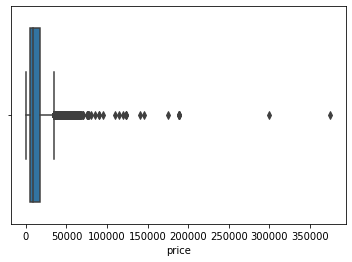

In [67]:
#boxplot untuk dataframe awal pada kolom 'price'
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

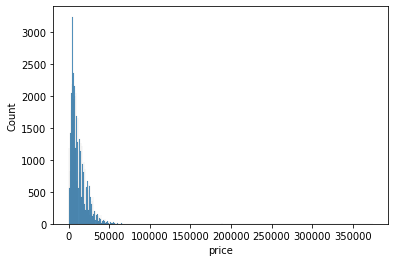

In [68]:
#bentuk histogram kolom 'price' dari dataframe awal
sns.histplot(df['price'])

<AxesSubplot:xlabel='price'>

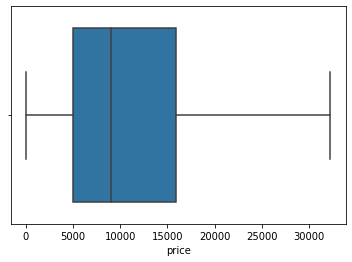

In [69]:
#boxplot untuk dataframe yang bebas outlier pada kolom 'price'
sns.boxplot(df6['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

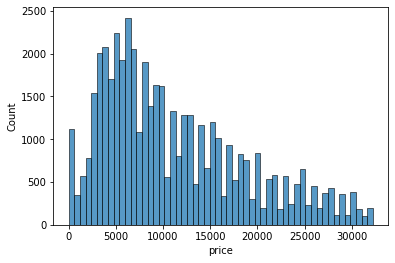

In [70]:
#bentuk histogram kolom 'price' dari dataframe yang bersih dari outlier
sns.histplot(df6['price'])

==> pada kolom price :
- data awal sangat banyak outlier sebagaimana yang dilihat pada boxplot, dan setelah dibersihkan tidak nampak adanya outlier yang tersisa
- setelah dihilangkan outlier, distribusi data bisa dilihat dan dianalisa dengan lebih mudah sebagaimana yang terlihat di histogram
- data menunjukkan secara umum harga menuju naik kemudian melandai setelah harga kendaraan sekitar 6500

<AxesSubplot:xlabel='age_car'>

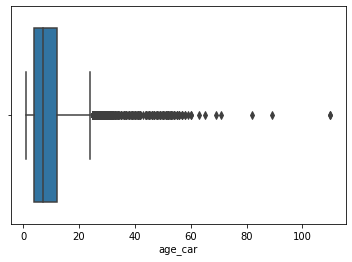

In [71]:
#boxplot untuk dataframe awal pada kolom 'age_car'
sns.boxplot(df['age_car'])

<AxesSubplot:xlabel='age_car', ylabel='Count'>

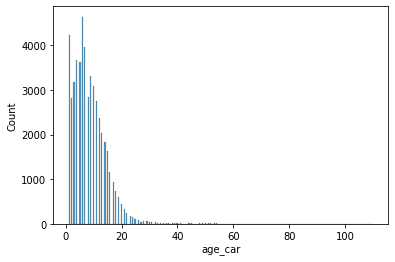

In [72]:
#bentuk histogram kolom 'age_car' dari dataframe awal
sns.histplot(df['age_car'])

<AxesSubplot:xlabel='age_car'>

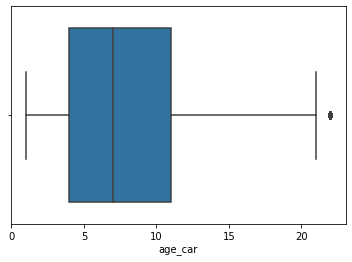

In [73]:
#boxplot untuk dataframe yang bebas outlier pada kolom 'age_car'
sns.boxplot(df6['age_car'])

<AxesSubplot:xlabel='age_car', ylabel='Count'>

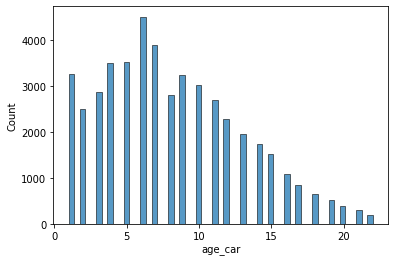

In [74]:
#bentuk histogram kolom 'age_car' dari dataframe yang bersih dari outlier
sns.histplot(df6['age_car'])

==> pada kolom age_car :
- data awal sangat banyak outlier sebagaimana yang dilihat pada boxplot, dan setelah dibersihkan tidak nampak adanya outlier yang tersisa
- setelah dihilangkan outlier, distribusi data bisa dilihat dan dianalisa dengan lebih mudah sebagaimana yang terlihat di histogram
- data menunjukkan umur kendaraan 1 tahun angkanya cukup besar karena ini mencakup umur kendaraan baru beli sampai dengan 1 tahun
- selanjutnya grafik jumlah kendaraan menanjak dari umur 2-6 tahun kemudian jumlah nya turun setelahnya

<AxesSubplot:xlabel='odometer'>

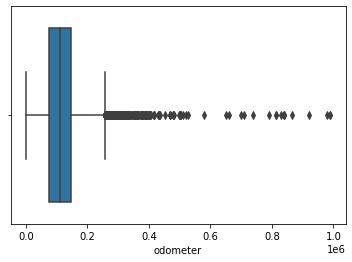

In [75]:
#boxplot untuk dataframe awal pada kolom 'odometer'
sns.boxplot(df['odometer'])

<AxesSubplot:xlabel='odometer', ylabel='Count'>

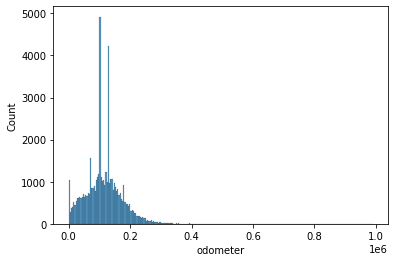

In [76]:
#bentuk histogram kolom 'odometer' dari dataframe awal
sns.histplot(df['odometer'])

<AxesSubplot:xlabel='odometer'>

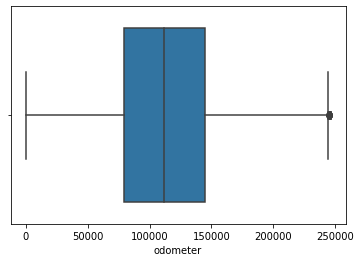

In [77]:
#boxplot untuk dataframe yang bebas outlier pada kolom 'odometer'
sns.boxplot(df6['odometer'])

<AxesSubplot:xlabel='odometer', ylabel='Count'>

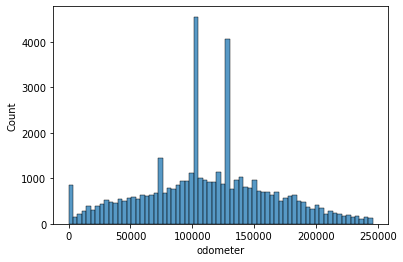

In [78]:
#bentuk histogram kolom 'odometer' dari dataframe yang bersih dari outlier
sns.histplot(df6['odometer'])

==> Kesimpulan, pada kolom odometer :
- data awal sangat banyak outlier sebagaimana yang dilihat pada boxplot, dan setelah dibersihkan dalam 1 iterasi, terlihat masih ada outlier yang berada di garis upper_whisker
- adanya outlier masih terlihat ketika data dimunculkan dengan histogram, akan tetapi secara umum pola data bisa terbaca dengan baik
- data menunjukkan secara umum harga menuju naik dari odometer 0 sampai dengan 10000 kemudian melandai turun setelahnya

## Masa Berlaku Iklan 

--> pada bagian ini kita akan : 
- melihat berapa hari iklan ditayangkan. 
- menghitung rata-rata dan mediannya. 
- Mendapatkan info berapa lama umumnya sebuah iklan ditayangkan. 
- menentukan kapan iklan dihapus dengan cepat
- kapan iklan ditayangkan dalam waktu yang sangat lama.

In [79]:
#cek deskripsi kolom days_listed
df6['days_listed'].describe()

count    47281.000000
mean        39.543368
std         28.201952
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<AxesSubplot:xlabel='days_listed'>

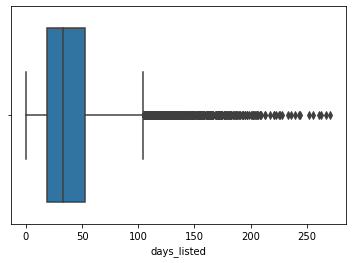

In [80]:
#lihat boxplot kolom days_listed
sns.boxplot(df6['days_listed'])

<AxesSubplot:xlabel='days_listed', ylabel='Count'>

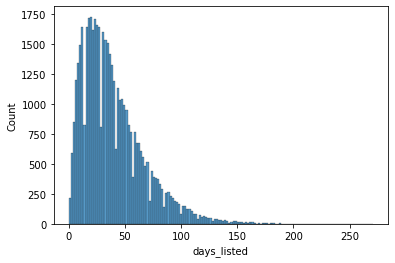

In [81]:
#cek histogram kolom days_listed
sns.histplot(df6['days_listed'])

==> karena terdeteksi adanya outlier pada kolom days_listed, maka coba di hilangkan supaya analisanya lebih akurat. sebelumnya ini tidak kita lakukan karena tidak termasuk dalam parameter inti yang akan kita analisa


In [82]:
# Tentukan batas bawah dan batas atas outlier yang baru untuk kolom 'days_listed'
Q1_dl = df6['days_listed'].quantile (0.25)
Q3_dl = df6['days_listed'].quantile (0.75)
IQR_dl = Q3_dl - Q1_dl


lower_whisker_dl = Q1_dl- (1.5*IQR_dl)
upper_whisker_dl = Q3_dl + (1.5*IQR_dl)
print ("Lower whisker days listed :",lower_whisker_dl )
print ("Upper whisker days listed :",upper_whisker_dl )
df7 = df6[(df6['days_listed']>lower_whisker_dl)&(df6['days_listed']<upper_whisker_dl)].reset_index(drop=True)


Lower whisker days listed : -32.0
Upper whisker days listed : 104.0


<AxesSubplot:xlabel='days_listed'>

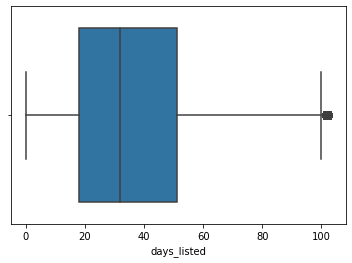

In [83]:
#cek boxplot days_listed yang baru
sns.boxplot(df7['days_listed'])

<AxesSubplot:xlabel='days_listed', ylabel='Count'>

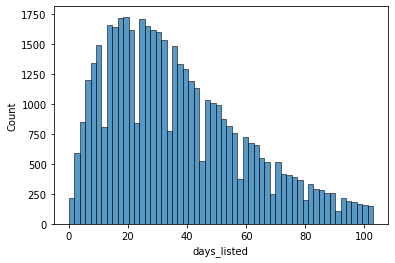

In [84]:
#cek histogram days_listed yang baru
sns.histplot(df7['days_listed'])

In [85]:
df7['days_listed'].describe()

count    45724.000000
mean        36.559247
std         23.055216
min          0.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        103.000000
Name: days_listed, dtype: float64

==> setelah kolom days_listed dibersihkan outliernya dapat diambil beberapa kesimpulan sbb :
- jumlah data terbaru adalah 45724
- rata rata masa berlaku iklan / iklan ditayangkan dengan mean adalah 36.5 hari dan  median / nilai tengah dari data adalah 32 hari, jadi umumnya iklan ditayangkan antara 32 - 36.5 hari
- iklan dihapus paling cepat adalah 0 hari, ini artinya mobil langsung laku di jual di hari yang sama
- iklan mobil paling lama adalah 103 hari

## Harga Rata-Rata Setiap Jenis Kendaraan


--> analisa selanjutnya :
- melakukan analisa terhadap jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan
- membuat grafik untuk menjuntukkan ketergantungan jumlah iklan pada jenis kendaraan
- cek 2 jenis kendaraan dengan jumlah iklan paling banyak

In [86]:
#membuat filter data jenis kendaraan berdasarkan harga dan jumlah iklan
agg_group = df7.groupby(['type']).agg({
    'price':'mean',
    'model':'count'}).rename(columns = {
    'price': 'avg_price',
    'model': 'count_type'}).sort_values(by='count_type',ascending = False)

In [87]:
agg_group

,avg_price,count_type
type,,
sedan,6996.197938,11544
SUV,10360.720685,11274
truck,14976.241512,10397
pickup,14851.078717,5831
coupe,13603.595388,1908
wagon,9061.219649,1425
mini-van,8064.746104,1091
hatchback,6848.290722,970
van,8728.345455,550


Text(0, 0.5, 'average price per type')

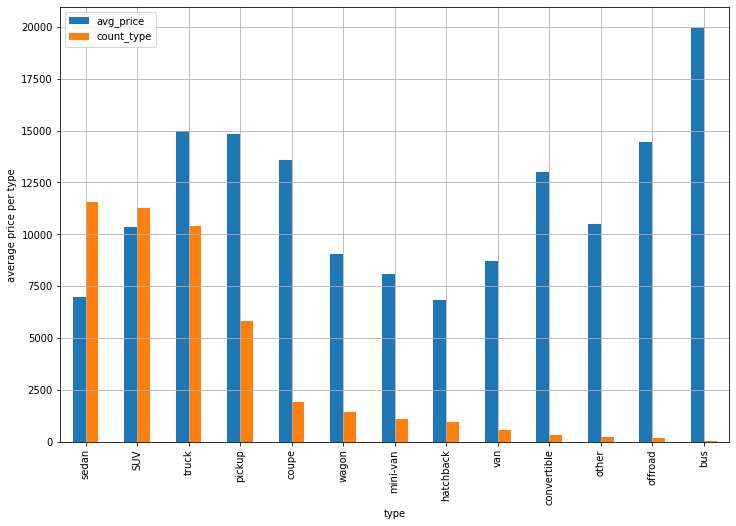

In [88]:
#menampilkan grafik jumlah iklan dan harga pada jenis kendaraan
agg_group.plot(kind='bar',grid=True,figsize=(12,8))
plt.ylabel('average price per type')

==> dari data diatas ada beberapa hal yang bisa diambil kesimpulan :
- jumlah iklan paling banyak adalah kendaraan sedan kemudian SUV
- sedan paling populer disini karena harganya termasuk no 2 terendah
- harga paling murah adalah jenis kendaraan hatchback
- sedangakan bus jumlah iklan paling sedikit, juga terlihat paling mahal

## Faktor Harga

--> selanjutnya adalah mempelajari faktor yang mempengaruhi harga kendaraan
- ambil contoh jenis kendaraan pada tahap sebelumnya
- cek ketergantungan harga terhadap usia, jarak tempuh, kondisi, tipe transmisi, dan warna
- membuat grafik 'boxplot' untuk variable kategorik (jenis transmisi dan warna)
- memunculkan grafik 'scaterplot' pada variabel sisanya

==> Jenis kendaraan populer adalah :
1. Sedan
2. SUV

==> analisa faktor/korelasi yang paling mempengaruhi harga Kendaraan terhadap :
- usia 'age_car'
- jarak tempuh 'odometer'
- kondisi 'condition'
- tipe transmisi 'transmision'
- warna 'color'


==> analisa Sedan

In [89]:
#memilih data sedan
data_sedan = df7[df7['type']=='sedan'].reset_index(drop=True)

In [90]:
#hitung korelasi data sedan dengan harga
data_sedan.corr()['price']

price              1.000000
model_year         0.624241
cylinders         -0.045246
odometer          -0.516694
is_4wd             0.032976
days_listed       -0.002039
year_posted        0.011621
month_posted      -0.016051
day_posted         0.007507
age_car           -0.618976
avg_odo            0.304238
condition_value    0.290118
Name: price, dtype: float64

==> selanjutnya analisa data kategorik ( transmisi dan warna ), dengan syarat jumlah data/iklan nya diatas 50

In [91]:
#analisa transmisi
data_sedan['transmission'].value_counts()

automatic    10872
manual         544
other          128
Name: transmission, dtype: int64

==> ternyata datanya diatas 50, jadi bisa dilanjut ke tahap selanjutnya yaitu visualisasi dalam bentuk boxplot

Text(0.5, 1.0, 'correlation between price and transmission for sedan')

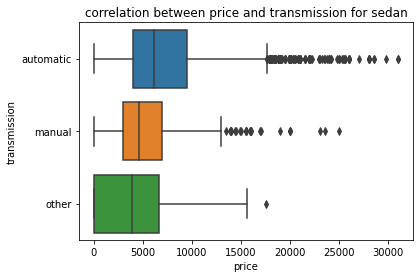

In [92]:
#memunculkan boxplot variable kategorik transmisi
sns.boxplot(data=data_sedan, x='price',y='transmission')
plt.title ('correlation between price and transmission for sedan')


--> analisa variable kategorik warna

In [93]:
#analisa warna
data_sedan['paint_color'].value_counts()

unknown    2080
silver     1953
black      1691
grey       1558
white      1429
blue       1168
red         894
custom      287
brown       245
green       188
purple       21
yellow       21
orange        9
Name: paint_color, dtype: int64

==> data ini tidak valid untuk analisa, karena syarat untuk bisa di analisa adalah jumlah iklan nya harus lebih dari 50
- jadi perlu bikin dataframe baru yang jumlah iklan color nya diatas 50

In [94]:
list_color_more_than_50 = list(data_sedan['paint_color'].value_counts()[:-3].index)

In [95]:
#dataframe baru dengan jumlah iklan paint_color diatas 50
new_data_sedan = data_sedan[data_sedan['paint_color'].isin(list_color_more_than_50)].reset_index(drop=True)

Text(0.5, 1.0, 'correlation between price and paint_color for sedan')

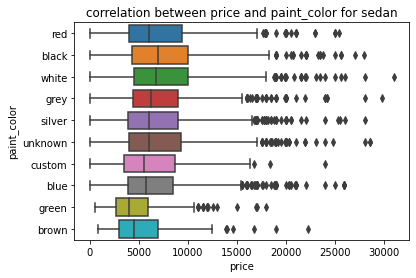

In [96]:
#membuat boxplot 
sns.boxplot(data=new_data_sedan, x='price',y='paint_color')
plt.title ('correlation between price and paint_color for sedan')

==> visualisasi korelasi harga terhadap parameter lainya (age_car,odometer,condition) dalam bentuk scaterplot

<AxesSubplot:xlabel='price', ylabel='age_car'>

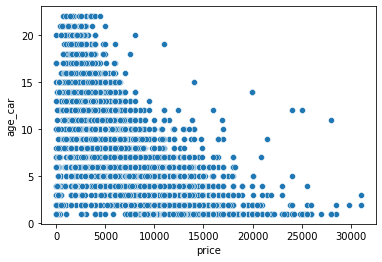

In [97]:
sns.scatterplot(data=data_sedan, x='price', y='age_car')

<AxesSubplot:xlabel='price', ylabel='odometer'>

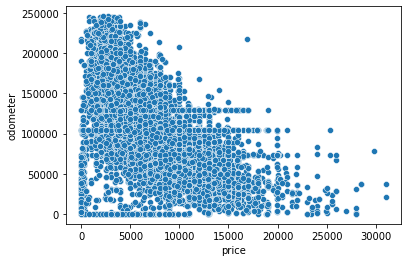

In [98]:
sns.scatterplot(data=data_sedan, x='price', y='odometer')

<AxesSubplot:xlabel='price', ylabel='condition'>

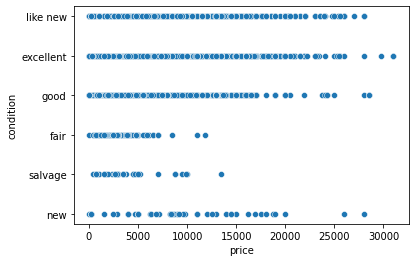

In [99]:
sns.scatterplot(data=data_sedan, x='price', y='condition')

==> pada jenis sedan, ternyata :
- harga sangat dipengaruhi oleh 2 paramater yaitu umur kendaraan dan jarak tempuh, semakin sedikit umur dan jarak tempuh maka harga kendaran makin besar
- sedangkan untuk kondisi kendaraan, terlihat bahwa yang harga terbaik ada pada kondisi kendaraan baru, excellent, like new dan good, sedangkan untuk salvage dan fair harganya murah
- tipe transmisi paling berkorelasi terhadap harga adalah yang tipe otomatis, kemudian manual dan yang terakhir adalah other
- untuk cat, distribusi korelasi warna thd harganya merata, sepertinya ini adalah karena selera dari pembeli

==> analisa SUV

In [100]:
data_SUV = df7[df7['type']=='SUV'].reset_index(drop=True)

In [101]:
data_SUV.corr()['price']

price              1.000000
model_year         0.578579
cylinders         -0.020053
odometer          -0.473847
is_4wd             0.110364
days_listed       -0.009214
year_posted       -0.002587
month_posted      -0.003827
day_posted        -0.001370
age_car           -0.579440
avg_odo            0.280965
condition_value    0.257873
Name: price, dtype: float64

==> selanjutnya analisa data kategorik ( transmisi dan warna ), dengan syarat jumlah data/iklan nya diatas 50

In [102]:
#analisa warna
data_SUV['transmission'].value_counts()

automatic    10687
manual         433
other          154
Name: transmission, dtype: int64

==> ternyata jumlah iklan nya diatas 50, jadi bisa dilanjut ke tahap selanjutnya yaitu visualisasi dalam bentuk boxplot


Text(0.5, 1.0, 'correlation between price and transmission for SUV')

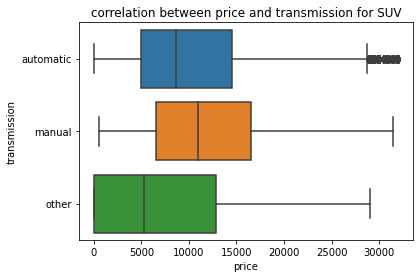

In [103]:
sns.boxplot(data=data_SUV, x='price',y='transmission')
plt.title ('correlation between price and transmission for SUV')

In [104]:
#analisa warna
data_SUV['paint_color'].value_counts()

unknown    2022
black      1983
white      1753
silver     1464
grey       1106
blue        959
red         828
green       389
brown       330
custom      284
orange       78
yellow       41
purple       37
Name: paint_color, dtype: int64


==> data ini tidak valid untuk analisa, karena syarat untuk bisa di analisa adalah jumlah iklan nya harus lebih dari 50
- jadi perlu bikin dataframe baru yang jumlah iklan color nya diatas 50

In [105]:
list(data_SUV['paint_color'].value_counts()[:-2].index)

['unknown',
 'black',
 'white',
 'silver',
 'grey',
 'blue',
 'red',
 'green',
 'brown',
 'custom',
 'orange']

In [106]:
list_color_more_than_50 = list(data_SUV['paint_color'].value_counts()[:-2].index)

In [107]:
new_data_SUV = data_SUV[data_SUV['paint_color'].isin(list_color_more_than_50)].reset_index(drop=True)


Text(0.5, 1.0, 'correlation between price and paint_color for SUV')

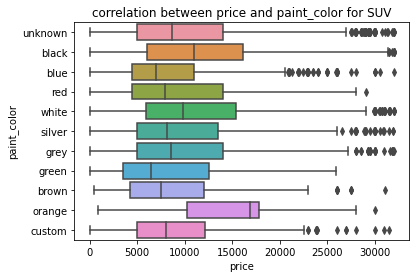

In [108]:
sns.boxplot(data=new_data_SUV, x='price',y='paint_color')
plt.title ('correlation between price and paint_color for SUV')

==> visualisasi korelasi harga terhadap parameter lainya (age_car,odometer,condition) dalam bentuk scaterplot


<AxesSubplot:xlabel='price', ylabel='age_car'>

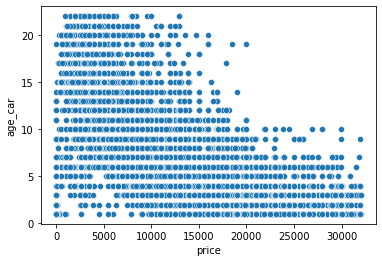

In [109]:
sns.scatterplot(data=data_SUV, x='price', y='age_car')

<AxesSubplot:xlabel='price', ylabel='odometer'>

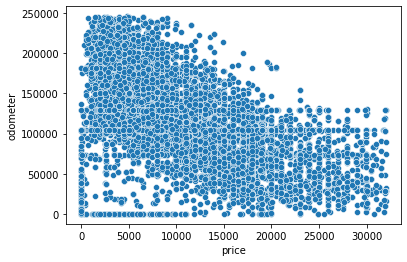

In [110]:
sns.scatterplot(data=data_SUV, x='price', y='odometer')

<AxesSubplot:xlabel='price', ylabel='condition'>

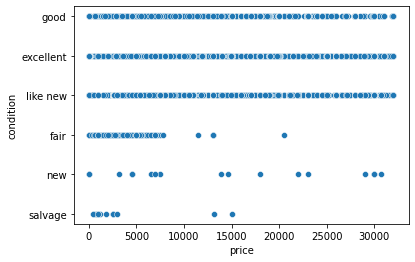

In [111]:
sns.scatterplot(data=data_SUV, x='price', y='condition')

==> pada jenis SUV, ternyata :
- harga sangat dipengaruhi oleh 2 paramater yaitu umur kendaraan dan jarak tempuh
- pada variable umur kendaraan, transaksi banyak dilakukan mulai kendaraan berumur 3 tahun atau lebih
- pada variable odometer, mulai banyak transaksi ketika kendaraan memiliki jarak tempuh 5000 keatas
- sedangkan untuk kondisi kendaraan, terlihat bahwa yang harga terbaik ada pada kondisi good, excellent, like new, sedangkan untuk salvage dan fair harganya murah, untuk kondisi new data harga nya sepertinya acak / tidak menentu, ini sedikit mencurigakan/diluar ekspektasi mengapa hal ini bisa terjadi
- tipe transmisi paling berkorelasi terhadap harga adalah yang tipe otomatis, kemudian manual dan yang terakhir adalah other
- untuk cat, distribusi korelasi warna thd harganya merata, sepertinya ini adalah karena selera dari pembeli

## Kesimpulan Umum
[Tuliskan kesimpulan penting Anda di bagian akhir ini, pastikan kesimpulan tersebut menyertakan kesimpulan yang menjelaskan cara Anda memproses dan menganalisis data. Laporkan nilai yang hilang, duplikat, *outlier*, dan kemungkinan alasan serta solusi untuk permasalahan yang harus Anda tangani. Jangan lupa untuk menghapus semua komentar dalam tanda kurung sebelum mengirimkan proyek Anda.]

==> KESIMPULAN <==

untuk melihat faktor apa saja yang mempengaruhi harga kendaraan yang diiklankan di situs web Crankshaft List diperlukan beberapa langkah sbb:
- menangani nilai yang hilang pada kolom
    - is_4wd diisi dengan '0' --> asumsi kalau tidak 4wd maka model biasa/non 4wd
    - paint_color diisi dengan 'unknown' --> karena kita tidak tahu cat nya sperti apa
    - odometer diisi dengan median  --> karena dari boxplot terlihat banyak outlier, maka dipilih median biar aman
    - cylinders diisi dengan median --> data nya aman, jadi bisa menggunakan median ataupun mean, kita pilih median saja
    - model_year diisi dengan median  --> karena dari boxplot terlihat banyak outlier, maka dipilih median biar aman
- memperbaiki tipe data yang tidak sesuai pada kolom
    - model_year dari float ke integer --> karena tahun tidak ada yang pecahan
    - cylinders dari float ke integer  --> karena jumlah silinder tidak ada yang pecahan
    - is_4wd dari int ke boolean     --> karena lebih mudah difahami dengan logika 'true' or 'False'
    - date_posted dari object ke format date time --> supaya lebih mudah di fahami

- menghilangkan outlier pada parameter inti :
    - harga
    - usia kendaraan saat iklan ditanyangkan
    - jarak tempuh 

- dari analisa data jumlah iklan dan harga dibandingkan tipe kendaraan didapati:
    - jumlah iklan paling banyak adalah kendaraan sedan kemudian SUV
    - sedan paling populer disini karena harganya termasuk no 2 terendah
    - harga paling murah adalah jenis kendaraan hatchback
    - sedangakan bus jumlah iklan paling sedikit, juga terlihat paling mahal

- dapat diambil kesimpulan pada 2 jenis kendaraan paling populer bahwa :
    - Jenis Kendaraan Sedan
        - harga sangat dipengaruhi oleh 2 paramater yaitu umur kendaraan dan jarak tempuh, semakin sedikit umur dan jarak tempuh maka harga kendaran makin besar
        - sedangkan untuk kondisi kendaraan, terlihat bahwa yang harga terbaik ada pada kondisi kendaraan baru, excellent, like new dan good, sedangkan untuk salvage dan fair harganya murah
        - tipe transmisi paling berkorelasi terhadap harga adalah yang tipe otomatis, kemudian manual dan yang terakhir adalah other
        - untuk cat, distribusi korelasi warna thd harganya merata, sepertinya ini adalah karena selera dari pembeli
        
    - Jenis Kendaraan SUV
    
        -harga sangat dipengaruhi oleh 2 paramater yaitu umur kendaraan dan jarak tempuh
        - pada variable umur kendaraan, transaksi banyak dilakukan mulai kendaraan berumur 3 tahun atau lebih
        - pada variable odometer, mulai banyak transaksi ketika kendaraan memiliki jarak tempuh 5000 keatas
        - sedangkan untuk kondisi kendaraan, terlihat bahwa yang harga terbaik ada pada kondisi good, excellent, like new, sedangkan untuk salvage dan fair harganya murah, untuk kondisi new data harga nya sepertinya acak / tidak menentu, ini sedikit mencurigakan/diluar ekspektasi mengapa hal ini bisa terjadi
        - tipe transmisi paling berkorelasi terhadap harga adalah yang tipe otomatis, kemudian manual dan yang terakhir adalah other
        - untuk cat, distribusi korelasi warna thd harganya merata, sepertinya ini adalah karena selera dari pembeli